## 1 - Descriptive data analysis

In [57]:
df = pd.read_csv("UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


### Dataset Overview

The dataset contains information about network connections, each described by several technical features.
Each row represents a network session, with columns such as:

* `proto`: the protocol used (e.g., TCP, UDP, ICMP)
* `service`: the service or port involved
* `spkts` and `dpkts`: number of packets sent and received
* `sbytes` and `dbytes`: amount of data exchanged
* `state`: connection state
* `rate`, `sttl`, `dttl`: traffic-related metrics
* `attack_cat`: type of attack (or “Normal” if no incident)
* `label`: target variable (0 = normal, 1 = attack)

The goal is to enable a machine learning model to distinguish between normal traffic and malicious connections based on these features.
The dataset contains 45 columns and several thousand records, providing a solid foundation for training an intrusion detection model.


In [58]:
# Dataset dimensions
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
df.info()

Nombre de lignes : 82332
Nombre de colonnes : 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82

The dataset contains 82,332 rows and 45 columns, combining both numerical and categorical features that describe different aspects of network traffic.


In [59]:
# Basic statistics for all numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,82332.0,4.116650e+04,2.376735e+04,1.0,20583.750000,4.116650e+04,6.174925e+04,8.233200e+04
dur,82332.0,1.006756e+00,4.710444e+00,0.0,0.000008,1.413800e-02,7.193603e-01,5.999999e+01
spkts,82332.0,1.866647e+01,1.339164e+02,1.0,2.000000,6.000000e+00,1.200000e+01,1.064600e+04
dpkts,82332.0,1.754594e+01,1.155741e+02,0.0,0.000000,2.000000e+00,1.000000e+01,1.101800e+04
sbytes,82332.0,7.993908e+03,1.716423e+05,24.0,114.000000,5.340000e+02,1.280000e+03,1.435577e+07
dbytes,82332.0,1.323379e+04,1.514715e+05,0.0,0.000000,1.780000e+02,9.560000e+02,1.465753e+07
rate,82332.0,8.241089e+04,1.486204e+05,0.0,28.606114,2.650177e+03,1.111111e+05,1.000000e+06
sttl,82332.0,1.809677e+02,1.015134e+02,0.0,62.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,82332.0,9.571300e+01,1.166677e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.530000e+02
sload,82332.0,6.454902e+07,1.798618e+08,0.0,11202.466797,5.770032e+05,6.514286e+07,5.268000e+09


The numerical statistics show that the dataset contains a wide range of values, with some features having very high maximums, indicating the presence of outliers or highly variable network behaviors.

In [60]:
# Percentage of missing values per column
missing = (df.isnull().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing

Series([], dtype: float64)

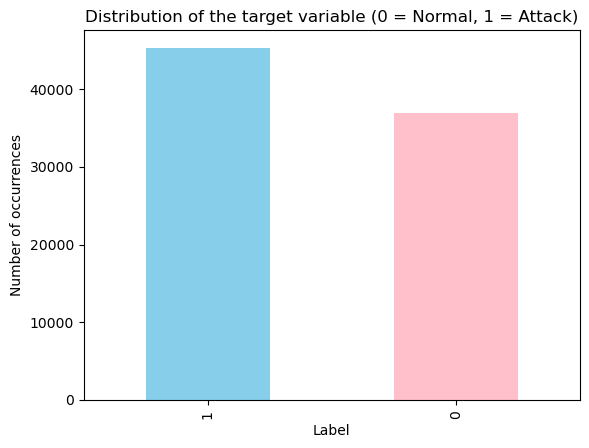

In [61]:
if 'label' in df.columns:
    df['label'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
    plt.title("Distribution of the target variable (0 = Normal, 1 = Attack)")
    plt.xlabel("Label")
    plt.ylabel("Number of occurrences")
    plt.show()

The bar chart shows the distribution of the target variable.  
We can see that normal connections (label 0) are slightly more frequent than attack connections (label 1).  
This indicates that the dataset is relatively balanced, which is a good condition for training a machine learning model without introducing bias.

In [62]:
for col in ['proto', 'service', 'state']:
    if col in df.columns:
        print(f"\n{col} :")
        print(df[col].value_counts().head(10))


proto :
proto
tcp     43095
udp     29418
unas     3515
arp       987
ospf      676
sctp      324
any        96
gre        88
rsvp       64
ipv6       61
Name: count, dtype: int64

service :
service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
Name: count, dtype: int64

state :
state
FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: count, dtype: int64


The dataset is mainly composed of TCP and UDP protocols, DNS and HTTP services, and the most frequent connection states are FIN and INT, which is typical for normal network traffic patterns.

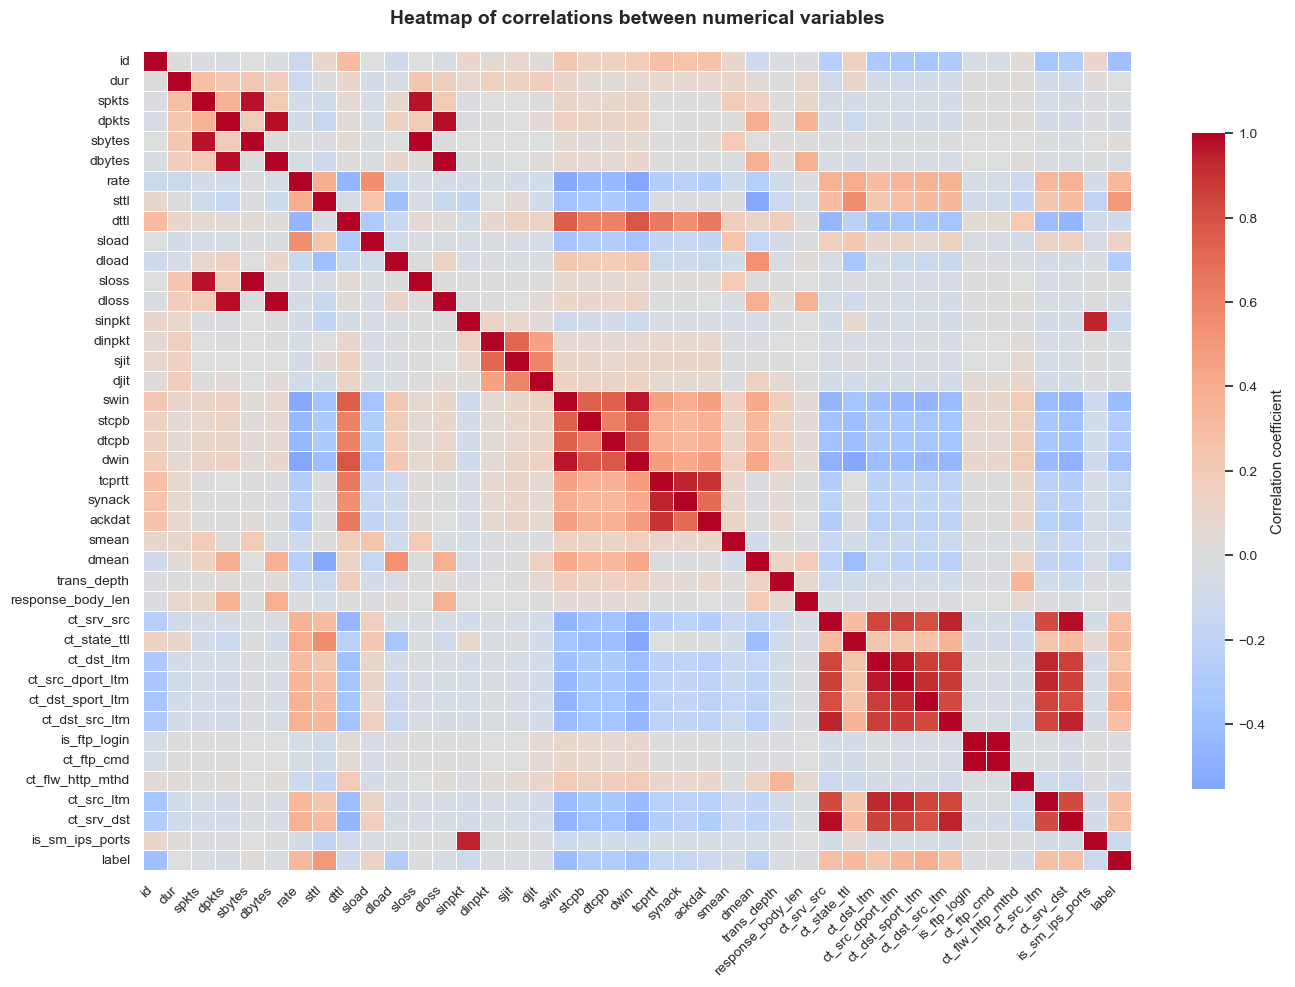

In [63]:
# Selection of numerical columns
num_cols = df.select_dtypes(include='number')

corr = num_cols.corr()

plt.figure(figsize=(14,10))
sns.set(font_scale=0.9) 
sns.set_style("whitegrid")

heatmap = sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=False,         
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8, 'label': 'Correlation coefficient'}
)

plt.title("Heatmap of correlations between numerical variables", fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The correlation heatmap highlights strong positive relationships between several traffic-related features, such as packet counts, byte volumes, and transmission rates.  
This observation is logical, as these variables describe similar aspects of network activity.  
Conversely, a few negative correlations can be seen, indicating inverse relationships between certain features.  

### Conclusion

The dataset UNSW-NB15 contains 82,332 rows and 45 columns describing different aspects of network connections.  
The data includes both numerical and categorical features such as protocols, services, packet counts, and byte volumes.  
No missing values were found, which means the dataset is clean and ready for processing.  
The analysis also showed that most connections use common protocols like TCP and UDP, with services such as DNS and HTTP being the most frequent.  
The target variable (label) is relatively balanced between normal and attack records, allowing for fair model training.  
Overall, the dataset appears consistent and well-structured, providing a solid foundation for building an intrusion detection model.


## Implementation of the Necessary Pre-processing

In [64]:
data = df.copy()

# Remove unnecessary columns 
data = data.drop(columns=['id', 'attack_cat'], errors='ignore')

# Replacing missing values
data = data.fillna(0)

# Converting text features into numerical values
le = LabelEncoder()
for col in ['proto', 'service', 'state']:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

data.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,117,0,4,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,117,0,4,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,117,0,4,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,117,0,4,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,117,0,4,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


The preprocessing step was successfully applied.  
Categorical variables such as proto, service, and state were encoded into numerical values, and all missing data were replaced with zeros.  
As a result, the dataset now contains only numerical columns (43 in total), making it ready for normalization and model training.


In [65]:
# X = columns used for prediction
# y = the "label" column (attack or not)

X = data.drop(columns=['label'])
y = data['label']

print("X shape :", X.shape)
print("y shape :", y.shape)


X shape : (82332, 42)
y shape : (82332,)


`X` contains 42 network features used for prediction, and `y` represents the label that shows if the connection is normal or an attack.

In [66]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (65865, 42)
Test set size: (16467, 42)


The features were normalized using `StandardScaler` to ensure that all variables have the same scale, which improves model performance.  
The dataset was then split into a training set (80%) and a testing set (20%) to evaluate the model’s ability to generalize to new data.  
This division allows the model to learn patterns from most of the data while keeping a portion aside for fair performance assessment.

In [67]:
# Model creation
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7418
           1       0.98      0.97      0.98      9049

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



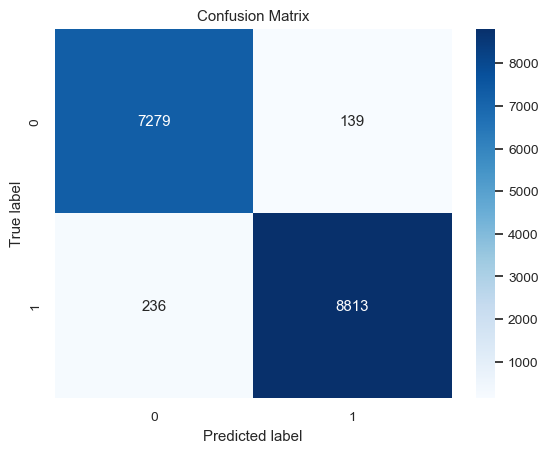

In [68]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


### Confusion Matrix Analysis

The model achieved an excellent performance with an overall **accuracy of 98%**.  
Both classes **normal (0)** and **attack (1)** were predicted with high precision and recall values (around **0.97–0.98**), showing that the model can correctly identify most attacks while minimizing false predictions.  
The confusion matrix confirms this: the majority of samples are correctly classified, with only **139 false positives** and **236 false negatives**.  
Overall, the model demonstrates strong reliability and efficiency for **intrusion detection**.


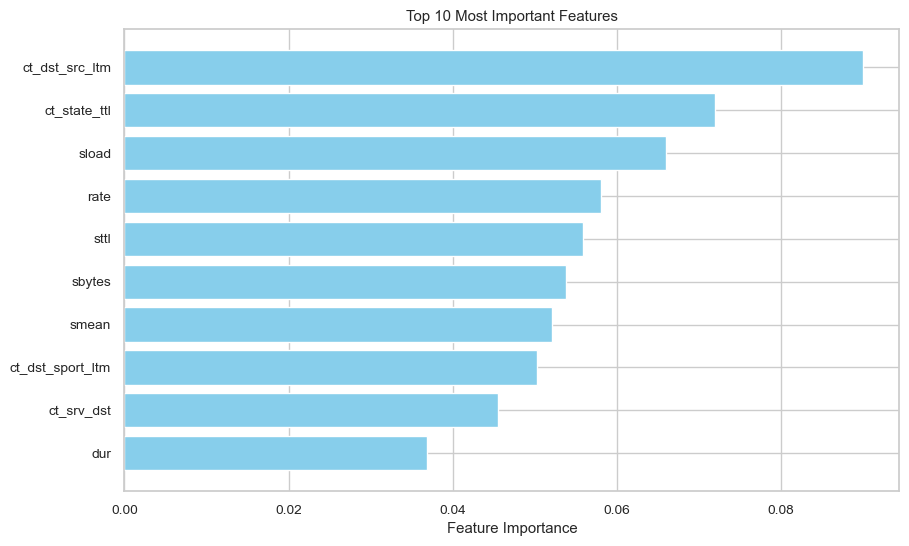

In [69]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] 

plt.figure(figsize=(10,6))
plt.title("Top 10 Most Important Features")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

The analysis of feature importance shows that some variables play a key role in detecting attacks.  
The most influential features are ct_dst_src_ltm and ct_state_ttl, which indicate network behavior related to connection tracking and packet state.  
Other variables such as sload, rate, and sttl also have high importance, suggesting that traffic volume and transmission rate are strong indicators of potential intrusions.  
Overall, the model relies mainly on network flow metrics to distinguish between normal and malicious activity.


### Conclusion

In this study, we developed a machine learning model based on the **Random Forest algorithm** to detect malicious network activity using the **UNSW-NB15 dataset**.  
After preprocessing, normalization, and model training, the system achieved an impressive **98% accuracy**, demonstrating its strong ability to distinguish between normal and attack traffic.  

The model’s balanced **precision** and **recall** indicate that it is both reliable and consistent, minimizing false positives and false negatives.  
These results confirm that supervised learning can effectively support **Intrusion Detection Systems (IDS)** by automating the identification of abnormal patterns in network behavior.  

For future improvements, further optimization — such as **hyperparameter tuning**, **feature selection**, or **deep learning approaches** — could enhance performance and adaptability to evolving cyber threats.

## 3 - Formalisation of the problem

The goal of this project is to build an **Intrusion Detection System (IDS)** capable of distinguishing between normal and malicious network activity.  
This task is formulated as a **supervised binary classification problem**, where each network connection is represented by a set of numerical and categorical features extracted from the UNSW-NB15 dataset.

Since the dataset includes labeled examples of both normal and attack connections, this task fits into the framework of **supervised learning**, where the model learns from historical data to predict future behavior.

The target variable `label` takes two possible values:
- **0** -> normal traffic  
- **1** -> attack or abnormal behavior  

The objective is to train a model \( f(x) \) that maps input features \( x \) (e.g., protocol, packet counts, data size, connection state) to an output label \( y \in \{0, 1\} \).  
Formally, the model learns a function that minimizes the classification error:

$$
f^* = \arg\min_f \; \mathbb{E}_{(x, y)} [L(f(x), y)]
$$

where \( L \) is the loss function measuring the difference between the predicted and true labels.  
The dataset contains both numerical and categorical attributes, and some attack categories are less frequent, which can lead to a **class imbalance** challenge.  

The ultimate goal is to deploy a model that can automatically flag suspicious connections in real time, assisting security teams in preventing or mitigating cyberattacks more efficiently.


## 4 - Selection of a baseline model and implementation of the model

To evaluate the feasibility of automated intrusion detection, a **baseline machine learning model** was implemented.  
The goal of this step is to test a simple yet effective algorithm and establish a performance benchmark for future model improvements.

### Choice of the baseline model

The **Random Forest classifier** was chosen as the baseline model due to its robustness and interpretability.  
It is an ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.  
Random Forests are particularly suited for network intrusion detection because they can handle:
- **Mixed data types** (numerical and categorical features)  
- **Non-linear relationships** between variables  
- **High-dimensional datasets** without complex preprocessing  

Additionally, Random Forests provide **feature importance scores**, which help identify the most relevant attributes for attack detection.

### Model implementation

After data preprocessing (cleaning, encoding, normalization, and train-test split), the Random Forest model was trained with 100 trees and a fixed random seed for reproducibility:

```python
# Model creation
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


### References

- UNSW-NB15 Dataset: [https://research.unsw.edu.au/projects/unsw-nb15-dataset](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

## Partie 2 : Notebook 


# LAB 6 — Partie II : Application Projet IDS (UNSW_NB15)

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, VotingClassifier

def metrics_table(y_true, y_pred, average='binary'):
    """Affiche les métriques principales."""
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    print(f"Accuracy : {acc:.3f}") 
    print(f"Précision : {prec:.3f}  |  Rappel : {rec:.3f}  |  F1 : {f1:.3f}")

def plot_cm(y_true, y_pred, title="Matrice de confusion"):
    """Affiche la matrice de confusion brute."""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format='d')
    plt.title(title)
    plt.show()

## 1) Chargement des données & cible binaire

In [71]:
df = pd.read_csv('UNSW_NB15_training-set.csv')

print('Shape :', df.shape)
print('Colonnes :', list(df.columns)[:10], '...')  # aperçu

target_col = None
if 'label' in df.columns:
    target_col = 'label'
elif 'Label' in df.columns:
    target_col = 'Label'
elif 'attack_cat' in df.columns:
    # Construit un label binaire : 0 = normal, 1 = attaque (tout sauf 'Normal')
    df['label'] = (df['attack_cat'].astype(str).str.lower() != 'normal').astype(int)
    target_col = 'label'
else:
    raise ValueError("Aucune colonne cible détectée ('label' ou 'attack_cat').")

drop_cols = [c for c in ['id', 'ID', 'srcip', 'dstip', 'stime', 'ltime', 'twid'] if c in df.columns]
df = df.drop(columns=drop_cols, errors='ignore')

y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

print('Cible :', target_col, '| Classe 0/1 ->', np.bincount(y.values))

Shape : (82332, 45)
Colonnes : ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate'] ...
Cible : label | Classe 0/1 -> [37000 45332]


Remarque : si des colonnes catégorielles existent (proto, service, state, etc.), elles seront encodées (OneHot). Les colonnes numériques seront standardisées uniquement pour SVM.

## 2) Train/Test split (stratifié)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train :', X_train.shape, '| Test :', X_test.shape)

Train : (65865, 43) | Test : (16467, 43)


## 3) Préprocessing (numérique + catégoriel)

In [73]:
# Détection des types
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()

print('Numériques :', len(num_cols), '| Catégorielles :', len(cat_cols))

numeric_scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocess_dt = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

preprocess_svm = ColumnTransformer(
    transformers=[
        ('num', numeric_scaler, num_cols),
        ('cat', ohe, cat_cols)
    ]
)

Numériques : 39 | Catégorielles : 4


## 4) GridSearchCV — Decision Tree

Best DT params : {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} | best F1 (CV) : 1.0000

-- Decision Tree (test) --
Accuracy : 1.000
Précision : 1.000  |  Rappel : 1.000  |  F1 : 1.000


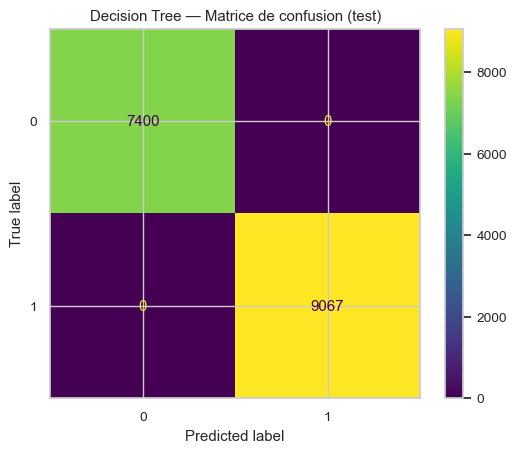

In [74]:
dt_pipe = Pipeline([
    ('prep', preprocess_dt),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_dt = {
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__max_depth': [5, 10, None],
    'clf__min_samples_split': [2, 10, 50],
    'clf__min_samples_leaf': [1, 5, 20]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_dt = GridSearchCV(dt_pipe, param_dt, scoring='f1', cv=cv, n_jobs=-1, verbose=0, refit=True)
grid_dt.fit(X_train, y_train)

print('Best DT params :', grid_dt.best_params_, '| best F1 (CV) :', f"{grid_dt.best_score_:.4f}")

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
print('\n-- Decision Tree (test) --')
metrics_table(y_test, y_pred_dt)
plot_cm(y_test, y_pred_dt, title='Decision Tree — Matrice de confusion (test)')

## 5) GridSearchCV — SVM

In [ ]:
svm_pipe = Pipeline([
    ('prep', preprocess_svm),
    ('clf', SVC(probability=True, random_state=42))
])

param_svm = {
    'clf__C': [0.5, 1, 2],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale']  # grille légère
}

grid_svm = GridSearchCV(svm_pipe, param_svm, scoring='f1', cv=cv, n_jobs=-1, verbose=0, refit=True)
grid_svm.fit(X_train, y_train)

print('Best SVM params :', grid_svm.best_params_, '| best F1 (CV) :', f"{grid_svm.best_score_:.4f}")

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print('\n-- SVM (test) --')
metrics_table(y_test, y_pred_svm)
plot_cm(y_test, y_pred_svm, title='SVM — Matrice de confusion (test)')

## 6) Ensembles : Bagging & Voting

In [ ]:
bag_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        random_state=42, 
        **{k.split('__',1)[1]: v for k,v in grid_dt.best_params_.items() if k.startswith('clf__')}
    ),
    n_estimators=25,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)

bag_dt_pipe = Pipeline([('prep', preprocess_dt), ('bag', bag_dt)])
bag_dt_pipe.fit(X_train, y_train)
y_pred_bagdt = bag_dt_pipe.predict(X_test)
print('-- Bagging DT (test) --')
metrics_table(y_test, y_pred_bagdt)
plot_cm(y_test, y_pred_bagdt, title='Bagging DT — Matrice de confusion (test)')

voting = VotingClassifier(
    estimators=[('dt', best_dt), ('svm', best_svm)],
    voting='soft'
)
voting.fit(X_train, y_train)
y_pred_vote = voting.predict(X_test)
print('\n-- Voting (soft) (test) --')
metrics_table(y_test, y_pred_vote)
plot_cm(y_test, y_pred_vote, title='Voting (soft) — Matrice de confusion (test)')

## 7) Comparaison finale

          Modèle  Accuracy   F1
0  Decision Tree       1.0  1.0
1            SVM       1.0  1.0
2     Bagging DT       1.0  1.0
3  Voting (soft)       1.0  1.0


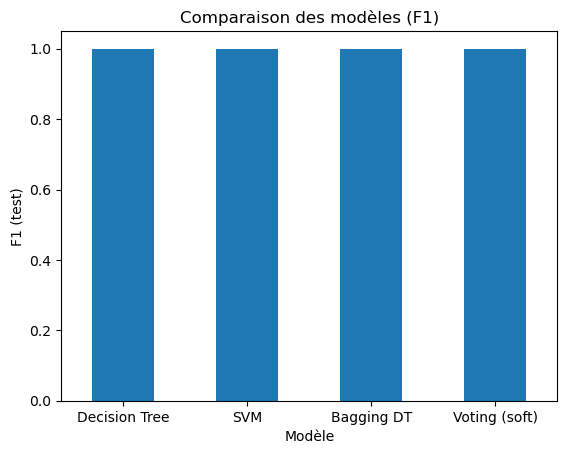

In [23]:
rés = []
for name, yhat in [
    ('Decision Tree', y_pred_dt),
    ('SVM', y_pred_svm),
    ('Bagging DT', y_pred_bagdt),
    ('Voting (soft)', y_pred_vote)
]:
    acc = accuracy_score(y_test, yhat)
    f1  = f1_score(y_test, yhat)
    rés.append((name, acc, f1))

df_res = pd.DataFrame(rés, columns=['Modèle', 'Accuracy', 'F1']).sort_values('F1', ascending=False)
print(df_res)

ax = df_res.plot(x='Modèle', y='F1', kind='bar', rot=0, legend=False)
plt.ylabel('F1 (test)')
plt.title('Comparaison des modèles (F1)')
plt.show()

> **Notes rapides** :
- **SVM** profite de la standardisation et gère bien les frontières non linéaires (kernel RBF).
- **Decision Tree** est explicable, mais sensible à l’overfitting (d’où GridSearch + min_samples_*).
- **Bagging DT** réduit la variance de l’arbre ; Voting combine les forces (souvent meilleur F1).



Multiclass, on sépare les 9 attaques. Utiliser gridSearch pour améliorer le rendu. ACP (modèle 2D) avant et apres mutliclass

## ACP (Binary Classification)

# Objective of the PCA

The goal of applying a 2-component PCA on the binary labels (Normal = 0, Attack = 1) is to:
Project the dataset into a 2D space while preserving as much variance as possible.
Visualize the separation between normal traffic and malicious traffic.
Identify whether attacks exhibit distinct network behavior compared to normal flows.
Provide an exploratory understanding of how well a linear projection (PCA) can separate benign vs. malicious activity before training machine-learning models.
PCA is not a classification algorithm; it is a dimensionality-reduction technique used for visualization and exploration.

Binary classes: [1 0]
Counts:
 attack_cat
1    36265
0    29600
Name: count, dtype: int64
Explained variance ratio: [0.06850306 0.02299803]
Total variance: 0.09150108623758701


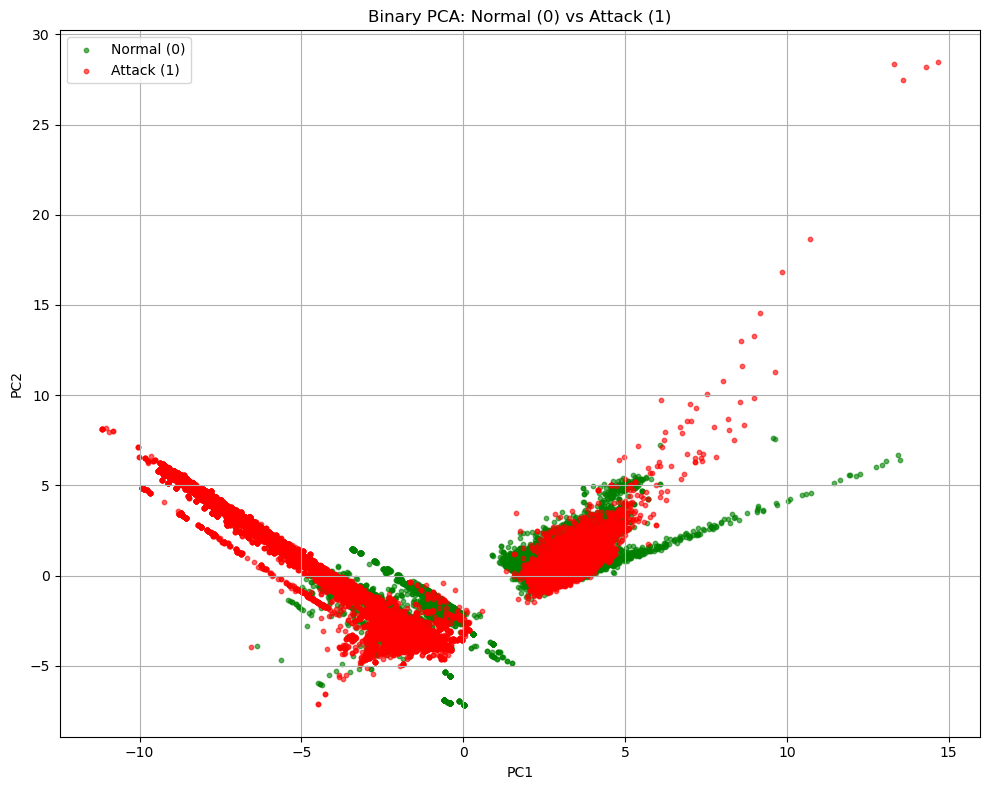

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

y_train_bin = (X_train["attack_cat"] != "Normal").astype(int)
y_test_bin  = (X_test["attack_cat"] != "Normal").astype(int)

print("Binary classes:", y_train_bin.unique())
print("Counts:\n", y_train_bin.value_counts())


X_train_trans = preprocess_dt.fit_transform(X_train)
X_test_trans  = preprocess_dt.transform(X_test)

-
try:
    X_train_trans = X_train_trans.toarray()
    X_test_trans  = X_test_trans.toarray()
except:
    pass


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled  = scaler.transform(X_test_trans)


#PCA 2D

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance:", pca.explained_variance_ratio_.sum())


# Plot PCA Binary: Normal vs Attack

plt.figure(figsize=(10, 8))

plt.scatter(
    X_train_pca[y_train_bin == 0, 0],
    X_train_pca[y_train_bin == 0, 1],
    s=10,
    alpha=0.6,
    color="green",
    label="Normal (0)"
)

plt.scatter(
    X_train_pca[y_train_bin == 1, 0],
    X_train_pca[y_train_bin == 1, 1],
    s=10,
    alpha=0.6,
    color="red",
    label="Attack (1)"
)

plt.title("Binary PCA: Normal (0) vs Attack (1)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ACP MULTICALSS (9 atttacks)


# Purpose of the Visualization

Principal Component Analysis (PCA) is used to reduce the dimensionality of the UNSW-NB15 dataset (44 features → 2 dimensions) in order to:
visualize the distribution of the 10 classes (Normal + 9 attack categories),
identify potential natural groupings,
observe areas where attack types overlap,
understand which attack families exhibit similar network behaviors.
PCA does not aim to perfectly separate classes. Instead, it provides a 2D projection that captures as much variance as possible from the original data.

Classes multiclass : ['Exploits' 'Reconnaissance' 'Normal' 'DoS' 'Generic' 'Fuzzers'
 'Shellcode' 'Backdoor' 'Analysis' 'Worms']
Explained variance: [0.06850306 0.02299803]
Total variance: 0.09150108623758701


/var/folders/2n/980pwhrj0t37jpv0hzp2wbr00000gn/T/ipykernel_4401/2195042158.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(classes))


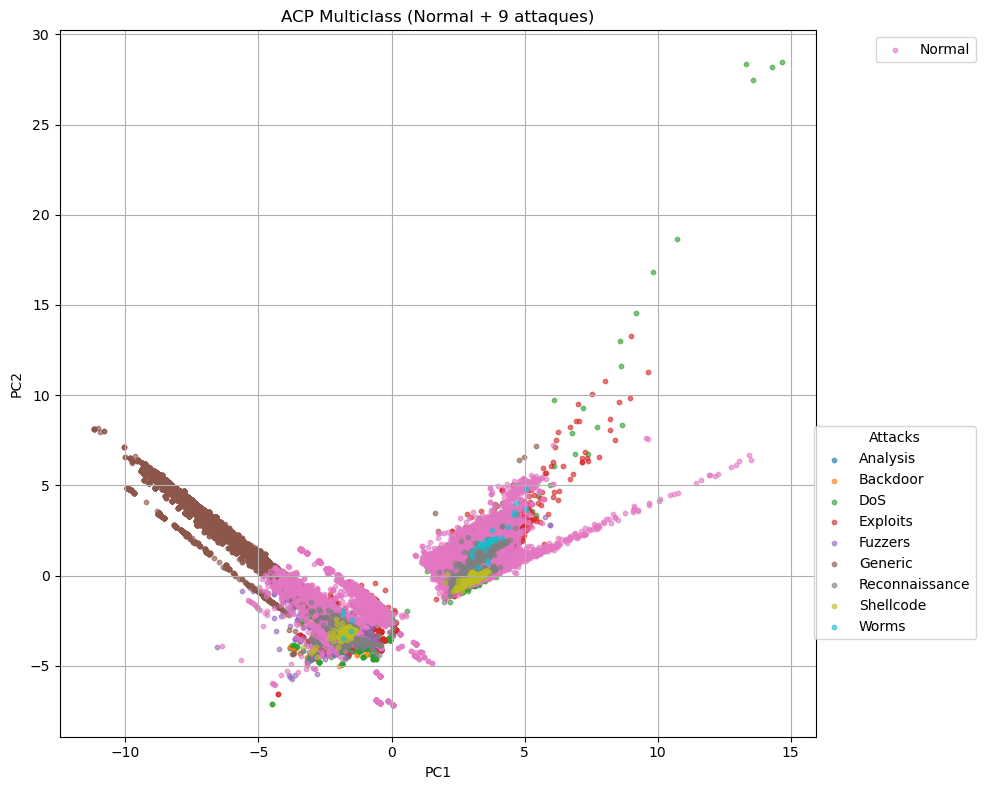

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Multiclass labels

y_train_mc = X_train['attack_cat']
y_test_mc  = X_test['attack_cat']

print("Classes multiclass :", y_train_mc.unique())


#Transformation with preprocess_dt

X_train_trans = preprocess_dt.fit_transform(X_train)
X_test_trans  = preprocess_dt.transform(X_test)


try:
    X_train_trans = X_train_trans.toarray()
    X_test_trans  = X_test_trans.toarray()
except:
    pass


#  Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_test_scaled  = scaler.transform(X_test_trans)


# PCA 2D

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Total variance:", pca.explained_variance_ratio_.sum())


# PCA Plot with separated legend (Normal vs Attacks)

def plot_pca_multiclass_custom_legend(X_pca, y, title="ACP Multiclass (Normal + 9 attaques)"):

    classes = np.unique(y)
    cmap = plt.cm.get_cmap("tab10", len(classes))

    plt.figure(figsize=(10, 8))

    attack_labels = []
    attack_handles = []
    normal_handle = None

    # Scatter each class
    for idx, c in enumerate(classes):
        mask = (y == c)

        scatter = plt.scatter(
            X_pca[mask, 0],
            X_pca[mask, 1],
            s=10,
            alpha=0.6,
            color=cmap(idx),
            label=str(c)
        )

        if c == "Normal":
            normal_handle = scatter
        else:
            attack_labels.append(str(c))
            attack_handles.append(scatter)

  
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)

   
    # Legend 1 
    
    legend_normal = plt.legend(
        handles=[normal_handle],
        labels=["Normal"],
        title="",
        loc="upper right",
        bbox_to_anchor=(1.22, 1)
    )
    plt.gca().add_artist(legend_normal)
   
    # Legend 2 
    
    plt.legend(
        handles=attack_handles,
        labels=attack_labels,
        title="Attacks",
        loc="upper right",
        bbox_to_anchor=(1.22, 0.45)
    )

    plt.tight_layout()
    plt.show()

plot_pca_multiclass_custom_legend(X_train_pca, y_train_mc)

#PC1 représente le niveau général d’activité réseau (bytes, durée, volume).
#PC2 représente des caractéristiques plus spécifiques des paquets (TTL, timing, protocoles).

# Interpretation of the PCA Plot

In the PCA scatter plot:
Each point represents a network flow (a row from the dataset).
Color indicates the class label (Normal or specific attack type).
The axes PC1 and PC2 represent the principal directions that explain the highest variance in the dataset.

# Key Observations:
Generic attacks form a very large cluster, which is expected since this is the most frequent attack type in UNSW-NB15 (over 50% of all attacks).
Some attack categories appear grouped together, showing that they share similar network characteristics.
Categories such as Reconnaissance, Exploits, and DoS may overlap, which is normal—they often share similarities in packet rate, port usage, or connection patterns.
Normal traffic tends to be located in a more compact region, indicating more stable and less chaotic behavior compared to attack traffic.
Since PCA is a linear dimensionality reduction method, perfect separation between classes is not expected. This does not imply that a classifier will perform poorly—only that the maximum-variance projection is not aligned with class boundaries.

# Description of the 9 Attack Categories

The UNSW-NB15 dataset contains the following attack classes:

Fuzzers :
Attacks that send random or malformed data to a service to trigger crashes or abnormal behavior.

Analysis :
Traffic related to advanced analysis and scanning, such as fingerprinting or reconnaissance activities.

Backdoor :
Installation of a hidden access mechanism that allows attackers to re-enter a system without authentication.
Example: creating a stealth administrator account.

DoS (Denial of Service) :
Attacks that overload a resource or service to make it unavailable.
Examples: SYN flood, UDP flood.

Exploits :
Direct exploitation of software vulnerabilities (buffer overflow, SQL injection, SMB/HTTP vulnerabilities, etc.).

Generic :
Cryptographic-based attacks that target weaknesses in cryptographic protocols like TLS/SSL.
This is the largest class in the dataset—hence the dominant cluster in the PCA plot.

Reconnaissance :
Scanning activities used to identify open ports, active hosts, or network structures.
Example: Nmap scans, ping sweeps.

Shellcode :
Injection of machine code designed to be executed when an exploit succeeds (common payload in buffer overflows).

Worms :
Self-propagating malware capable of spreading across networks without human intervention.


In [99]:
# ======================================================
# 1️⃣ PRÉPARATION DES DONNÉES (X et y)
# ======================================================

# Labels multiclass
y_train_mc = X_train['attack_cat']
y_test_mc  = X_test['attack_cat']

# On garde X tel quel : preprocess_dt fera l'encodage
X_train_raw = X_train.copy()
X_test_raw  = X_test.copy()


# ======================================================
# 2️⃣ PIPELINE (preprocess + scaler + modèle)
# ======================================================

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocess', preprocess_dt),               # encode / transform
    ('scaler', StandardScaler(with_mean=False)), # normalisation
    ('clf', RandomForestClassifier())            # modèle final
])


# ======================================================
# 3️⃣ PARAM GRID (Hyperparamètres testés)
# ======================================================

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 5]
}


In [ ]:
# ======================================================
# 4️⃣ GRIDSEARCHCV — Entraînement + Best Params
# ======================================================

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_raw, y_train_mc)




In [101]:

import pandas as pd

results = pd.DataFrame(grid.cv_results_)
summary = results[['params', 'mean_test_score', 'rank_test_score']]

print("\n📄 Résumé GridSearch :")
display(summary)


📄 Résumé GridSearch :


,params,mean_test_score,rank_test_score
0,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.996690,7
1,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.997130,5
2,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.996447,8
3,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.996872,6
4,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.999696,3
5,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.999696,3
6,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.999727,2
7,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.999742,1


/var/folders/2n/980pwhrj0t37jpv0hzp2wbr00000gn/T/ipykernel_4401/245874728.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


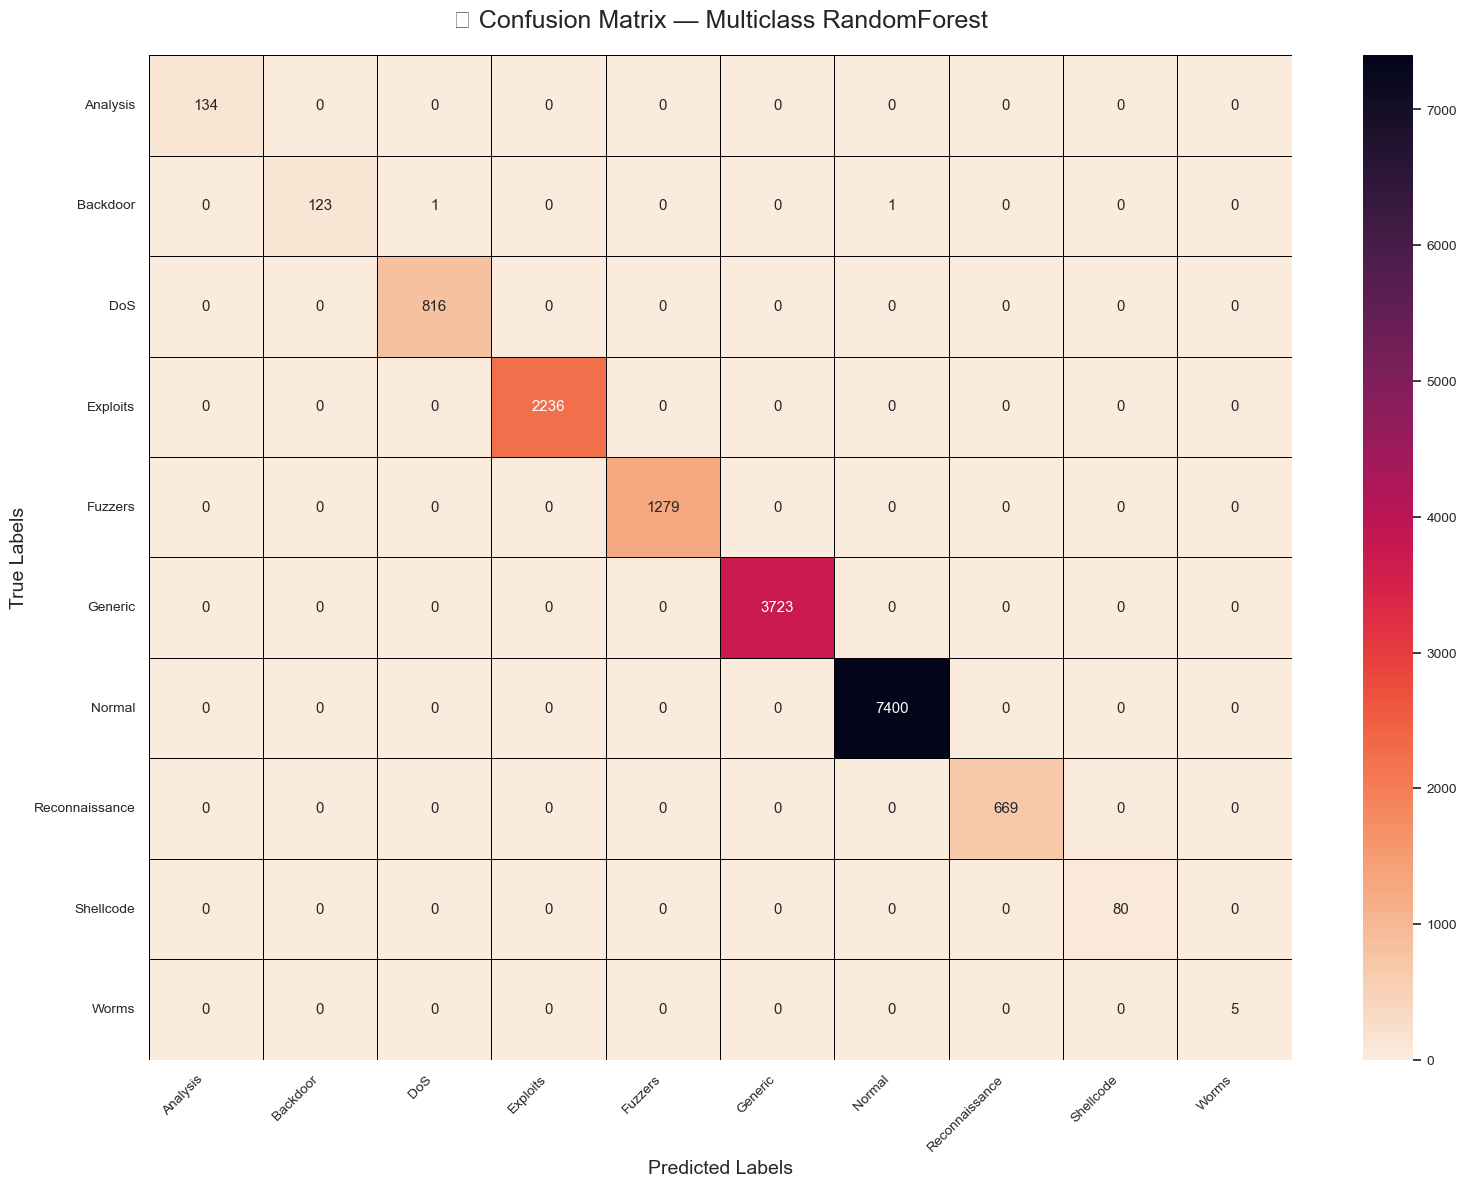

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Construire la matrice
cm = confusion_matrix(y_test_mc, y_pred)
labels = sorted(y_test_mc.unique())

plt.figure(figsize=(16, 12))
sns.heatmap(
    cm,
    annot=True,           # affiche les valeurs
    fmt="d",              # format entier
    cmap="rocket_r",      # palette classe ML
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='black'
)

plt.title("📊 Confusion Matrix — Multiclass RandomForest", fontsize=18, pad=20)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
